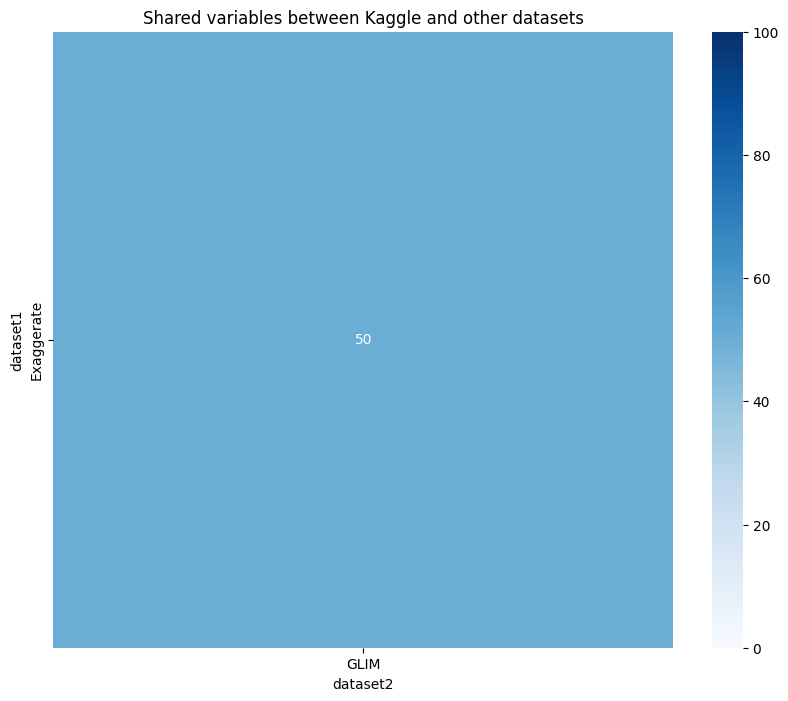

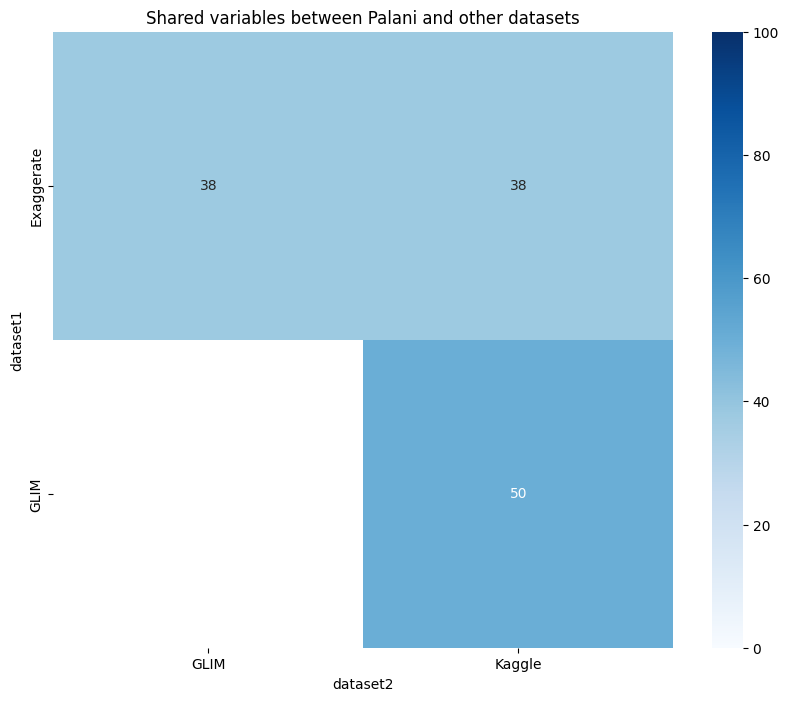

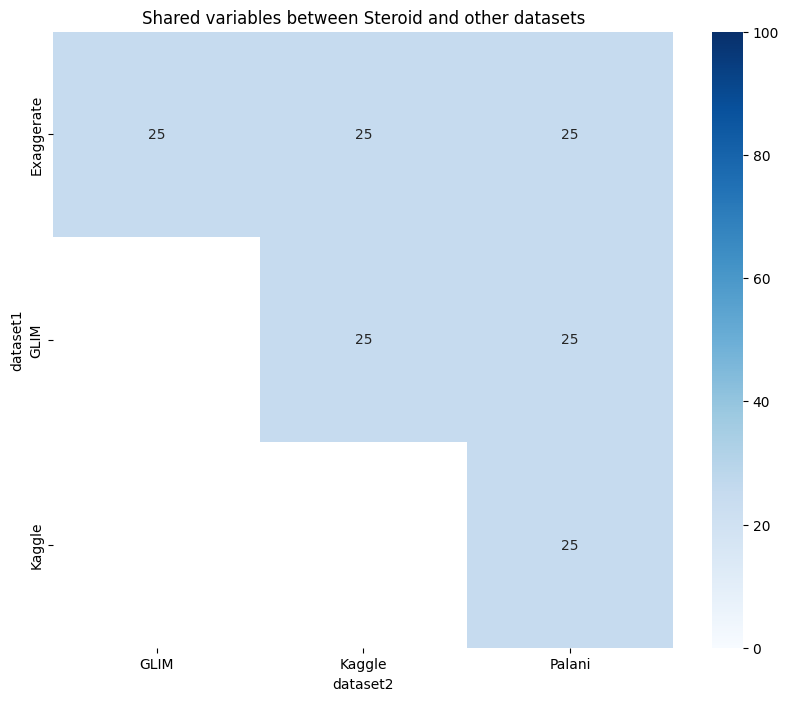

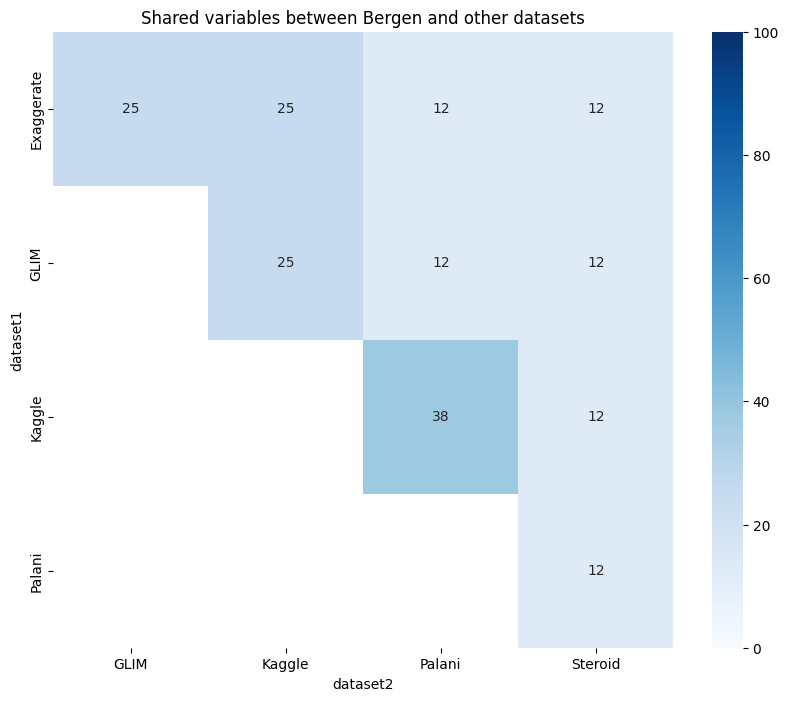

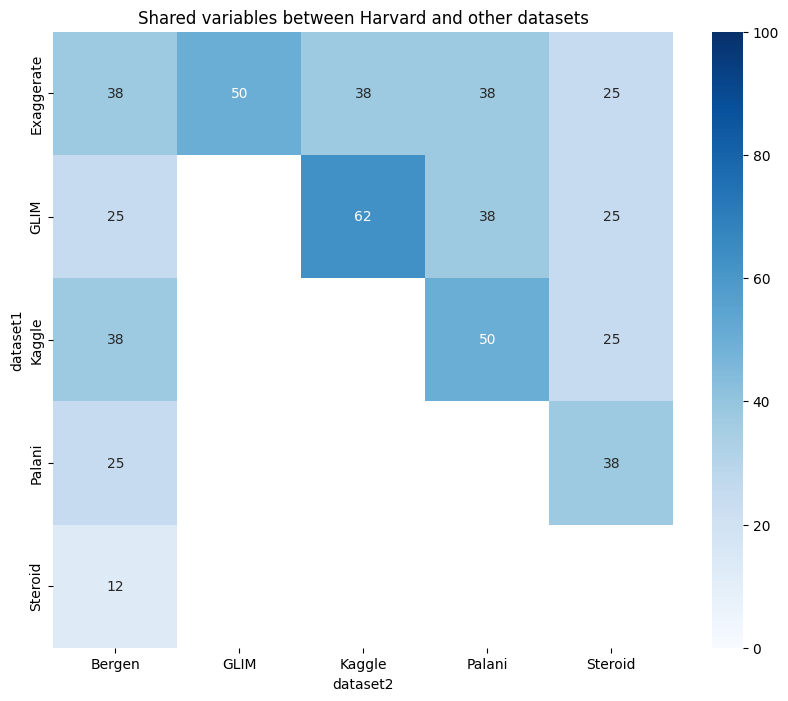

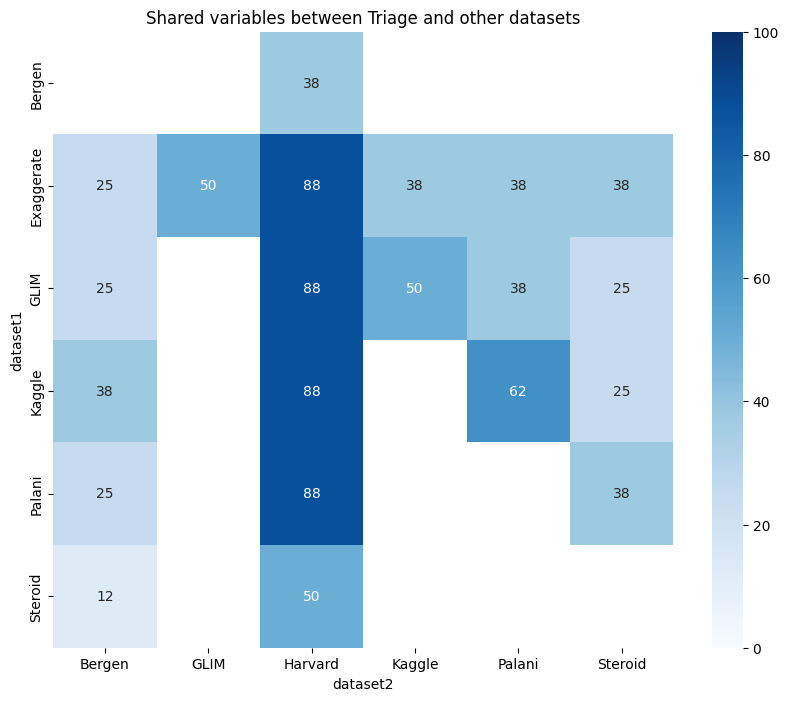

In [40]:
import pandas as pd
# read only the first 9 rows
common_variables = pd.read_excel('Dataset Overview.xlsx', sheet_name='Dataset x Var (letters)', nrows=8)
# each row is a dataset and each column is a variable
# if a value contains 'g' it means that the variable is present in the dataset

# calculate how often each combination of three datasets shares the same variables
# for example, how often do datasets 1, 2 and 3 share the same variables?

# create a list of all possible combinations of three datasets
from itertools import combinations
dataset_combinations = list(combinations(range(1, 9), 3))

# create a dictionary to store the results
results = {}

# loop through all combinations of three datasets
for combination in dataset_combinations:

    # create a list of the datasets in the combination
    datasets = [common_variables.iloc[combination[0] - 1], common_variables.iloc[combination[1] - 1], common_variables.iloc[combination[2] - 1]]
    # calculate the number of variables shared by all three datasets
    shared_variables = len(datasets[0][datasets[0] == 'g'][datasets[1] == 'g'][datasets[2] == 'g'])
    # add the result to the dictionary
    results[combination] = shared_variables
    # rename the key to a more readable format. The name of the dataset is in column 0 of the common_variables dataframe
    results[common_variables.iloc[combination[0] - 1][0], common_variables.iloc[combination[1] - 1][0], common_variables.iloc[combination[2] - 1][0]] = results.pop(combination)

# sort by the number of shared variables
# results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}
# print(results)

import pandas as pd
import numpy as np

# create a dataframe from the dictionary
df = pd.DataFrame.from_dict(results, orient='index', columns=['shared_variables'])
# add the names of the datasets to the dataframe
df['dataset1'] = [x[0] for x in df.index]
df['dataset2'] = [x[1] for x in df.index]
df['dataset3'] = [x[2] for x in df.index]
# add a column with the number of shared variables as a percentage of the total number of variables
df['shared_variables_percentage'] = df['shared_variables'] / 8 * 100
